<a href="https://colab.research.google.com/github/10-ThiagoB82/Classificar_Imagens_Keras_Tensorflow/blob/main/DEEP_LEARNING_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#IMPORTAR.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

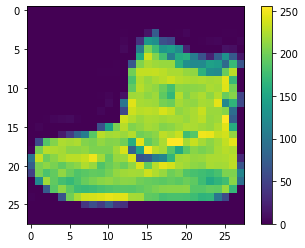

In [12]:
#CARREGAR O DATASET.
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()


#EXPLORAR OS DADOS.
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()


#EXIBIR OS DADOS.
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

In [13]:
#NORMALIZANDO AS IMAGENS.

imagens_treino = imagens_treino/float(250)

In [22]:
#CRIANDO,COMPILANDO,TREINANDO E NORMALIZANDO O MODELO.
#DROPOUT(0.2) DIMINUI O VALOR DO TREINO(MAIS USADO).

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
#    keras.layers.Dense(128, activation=tf.nn.relu),
#    keras.layers.Dense(64, activation=tf.nn.relu),
#    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6565 - accuracy: 0.7695 - val_loss: 0.4020 - val_accuracy: 0.8537
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4097 - accuracy: 0.8527 - val_loss: 0.3621 - val_accuracy: 0.8703
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3640 - accuracy: 0.8684 - val_loss: 0.3707 - val_accuracy: 0.8683
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3413 - accuracy: 0.8728 - val_loss: 0.3539 - val_accuracy: 0.8727
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3180 - accuracy: 0.8818 - val_loss: 0.3331 - val_accuracy: 0.8811


In [23]:
#SALVANDO E CARREGANDO O MODELO TREINADO.

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

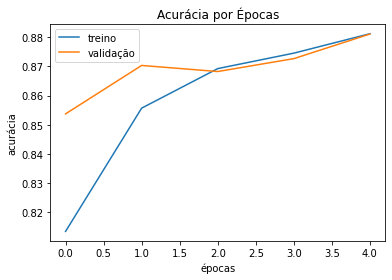

In [24]:
#GRÁFICO DA ACURÁCIA.

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


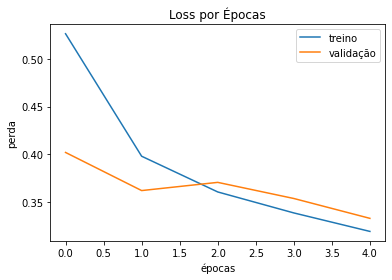

In [25]:
#GRÁFICO DO PERDAS.

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss por Épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [26]:
#TESTANDO O MODELO X MODELO SALVO.

testes = modelo.predict(imagens_teste)
print('Resultado do Teste: ', np.argmax(testes[1]))
print('Número da Imagem de Teste:', identificacoes_teste[1])


testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('Resultado do Teste Modelo Salvo:', np.argmax(testes_modelo_salvo[1]))
print('Número da Imagem de Teste:', identificacoes_teste[1])

Resultado do Teste:  2
Número da Imagem de Teste: 2
Resultado do Teste Modelo Salvo: 2
Número da Imagem de Teste: 2


In [27]:
#AVALIANDO O MODELO.

perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do Teste:', perda_teste)
print('Acurácia do Teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 56.1358 - accuracy: 0.8548
Perda do Teste: 56.135826110839844
Acurácia do Teste: 0.8547999858856201
